# k-NN Tutorial
The default similarity metric for k-NN is Euclidean distance.  
In some circumstances other metrics (or measures) will be more appropriate - for instance correlation.  
## Household Budget  
In the example here where households are classified based on how budget is allocated, correlation would be a better measure of similarity.   
The objective here is to replace Euclidean distance with correlation when selecting neighbours.

In [1]:
import pandas as pd
import numpy as np
import time

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

house = pd.read_csv('Household.csv',index_col = 'Household')
house.head()

,Groceries,Education,Travel,Category
Household,,,,
H1,2000,4000,500,C1
H2,3000,6000,1000,C1
H3,2000,2000,2000,C2
H4,3000,3000,3000,C2


In [2]:
y = house.pop('Category').values
X = house.values
X[0]

array([2000, 4000,  500])

In [3]:
q = [2500,3500,2000]
house2 = house.copy()
house2.loc['query'] = q

In [4]:
house2

,Groceries,Education,Travel
Household,,,
H1,2000,4000,500
H2,3000,6000,1000
H3,2000,2000,2000
H4,3000,3000,3000
query,2500,3500,2000


<AxesSubplot:>

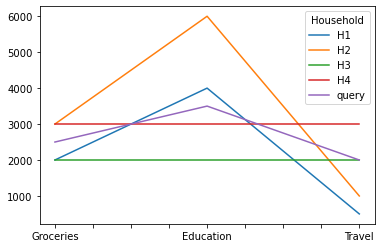

In [5]:
%matplotlib inline
house2.T.plot()

In [6]:
house_kNN = KNeighborsClassifier(n_neighbors=1) 
house_kNN.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [7]:
print('Query is classified as',house_kNN.predict([q])[0] )

Query is classified as C2


---
**Q4**   
Change the metric used by k-NN to correlation to see if it will predict the other class.

In [8]:
house_C_kNN = KNeighborsClassifier(n_neighbors=1, metric='correlation') 
house_C_kNN.fit(X,y)
print('Query is classified as',house_C_kNN.predict([q])[0] )

Query is classified as C1


---
**Q5**   
In the Data Normalisation example in the 02-kNN Notebook replace the N(0,1) scaler with a min-max scaler. 

In [9]:
athlete = pd.read_csv('AthleteSelection.csv',index_col = 'Athlete')
y = athlete.pop('Selected').values
X = athlete.values
names = athlete.index
q = [5.0,7.5]

In [10]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = mm_scaler.transform(X)
q_scaled = mm_scaler.transform([q])
q_scaled

array([[0.48      , 0.73333333]])

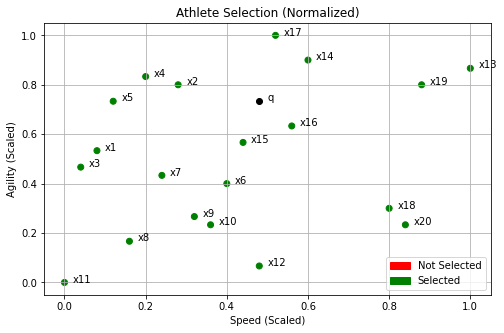

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color= ['red' if l == 0 else 'green' for l in y]
x1 = X_scaled[:,0]
x2 = X_scaled[:,1]
plt.figure(figsize=(8,5))
plt.scatter(x1,x2, color=color)
plt.scatter(q_scaled[0,0],q_scaled[0,1],color='black')
plt.annotate('q',(q_scaled[0,0]+0.02,q_scaled[0,1]))
plt.title("Athlete Selection (Normalized)")
plt.xlabel("Speed (Scaled)")
plt.ylabel("Agility (Scaled)")
plt.grid()
red_patch = mpatches.Patch(color='red', label='Not Selected')
blue_patch = mpatches.Patch(color='green', label='Selected')
plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (x1[i]+0.02, x2[i]))

**Q6**  
The code below loads the HTRU dataset from the UCI repository (https://archive.ics.uci.edu/ml/datasets/HTRU2).    
This dataset is divided into train and test sets and scaled.  
Then a *k*NN classifier is trained and tested. The time to classify the test data is also recorded.   
`scikit-learn` provides two strategies to speed up *k*-NN, `ball_tree` and `kd_tree`.  
Compare the performance of these two algorithms with brute force search `brute`.

In [12]:
# Load HTRU dataset
h_names = ['X1','X2','X3','X4','X5','X6','X7','X8','Class']
HTRU_df = pd.read_csv('HTRU_2.csv',index_col = False,names = h_names)
HTRU_df = HTRU_df.sample(frac=1)
    
y = HTRU_df.pop('Class').values
X_raw = HTRU_df.values

X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, test_size=2/3)

scaler = preprocessing.StandardScaler().fit(X_tr_raw) #A scaler object
X_train = scaler.transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

In [13]:
algs = ['brute', 'ball_tree', 'kd_tree']


In [14]:
for alg in algs:
    HTRU_kNN = KNeighborsClassifier(n_neighbors=3, algorithm = alg) 
    HTRU_kNN.fit(X_train,y_train)
    t_start = time.time()       
    acc = HTRU_kNN.score(X_test,y_test)
    t = time.time()-t_start
    print('Time: %5.2f Accuracy: %5.2f, Algorithm: %s' % (t, acc, alg))

Time:  1.40 Accuracy:  0.98, Algorithm: brute
Time:  0.37 Accuracy:  0.98, Algorithm: ball_tree
Time:  0.26 Accuracy:  0.98, Algorithm: kd_tree
